# **Q2**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# run this cell for plotting
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Implement this function for changing phases and amplitudes of images.

In [8]:
def draw_phase_amplitude(image):
    '''
    Returns the phase image and the amplitude image from the input image.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        tuple of numpy.ndarray: The tuple of the phase image and the amplitude image.
    '''

    phase = image.copy()
    amp = image.copy()

    # Writer your code here

    # Compute the 2D Fourier Transform of the image
    f_transform = np.fft.fft2(image)
    # Shift the zero frequency component to the center of the spectrum
    f_shift = np.fft.fftshift(f_transform)
    # Calculate the phase of the transformed image
    phase = np.angle(f_shift)
    # Calculate the amplitude (magnitude) of the transformed image and apply logarithmic scaling
    amplitude = np.log(np.abs(f_shift) + 1e-5)  # Adding a small constant to avoid log(0) errors

    return phase, amplitude

def change_phase_domain(image1, image2):
    '''
    Substitutes the phase of image1 by the phase of image2 and returns two new images.

    Parameters:
        image1 (numpy.ndarray): The input image1.
        image2 (numpy.ndarray): The input image2.

    Returns:
        tuple of numpy.ndarray: The tuple of result images.
    '''

    img1 = image1.copy()
    img2 = image2.copy()

    # Write your code here

    # Compute the Fourier Transform of both images
    f1 = np.fft.fft2(image1)
    f2 = np.fft.fft2(image2)

    # Extract magnitudes and phases of both Fourier Transforms
    magnitude1 = np.abs(f1)
    magnitude2 = np.abs(f2)
    phase1 = np.angle(f1)
    phase2 = np.angle(f2)

    # Combine the magnitude of one image with the phase of the other image
    combined1 = magnitude1 * np.exp(1j * phase2)  # Image1 with phase of Image2
    combined2 = magnitude2 * np.exp(1j * phase1)  # Image2 with phase of Image1

    # Perform the inverse Fourier Transform to convert back to spatial domain
    img1 = np.fft.ifft2(combined1).real  # Use .real to discard the imaginary part
    img2 = np.fft.ifft2(combined2).real

    return img1, img2

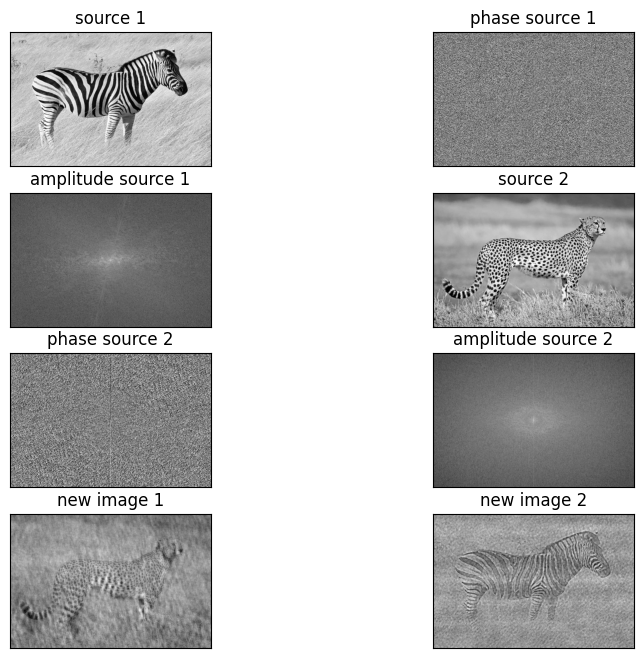

In [9]:
# dont change this cell
image_list = []
# image1 = cv2.imread(os.path.join('images', '1.jpg'), cv2.IMREAD_GRAYSCALE)
# image2 = cv2.imread(os.path.join('images', '2.jpg'), cv2.IMREAD_GRAYSCALE)
image1 = cv2.imread("/content/1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/2.jpg", cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'source 1', 'img'])

phase1, amp1 = draw_phase_amplitude(image1)
image_list.append([phase1, 'phase source 1', 'img'])
image_list.append([amp1, 'amplitude source 1', 'img'])

image_list.append([image2, 'source 2', 'img'])

phase2, amp2 = draw_phase_amplitude(image2)
image_list.append([phase2, 'phase source 2', 'img'])
image_list.append([amp2, 'amplitude source 2', 'img'])

res1, res2 = change_phase_domain(image1, image2)
image_list.append([res1, 'new image 1', 'img'])
image_list.append([res2, 'new image 2', 'img'])

plotter(image_list, 4, 2, True, 10, 8, 'Q3')

**conclusion:**

Switching the phase information between two images while keeping their amplitude information unchanged demonstrates the critical role of phase in determining an image's recognizable features, structure, and texture. This experiment highlights several key points:

Structure Preservation: The phase contains essential information about the spatial layout and structural integrity of the image, significantly influencing what we recognize in an image.

Recognition and Perception: Phase information is paramount for both human and computer vision systems in recognizing and interpreting images, more so than amplitude information which influences brightness and contrast.

Texture and Detail: The detailed textures and patterns within an image are encoded in the phase, making it crucial for conveying the finer aspects of the image's appearance.